<h1><center> Predictive statistics on the I-SPY1 Clinical Trial</center></h1>

In [1]:
# import custom modules wrote by julio
import importlib
import seaborn as sns
%matplotlib inline
from capstone_01 import clean_data
from capstone_01 import inferential_statistics

# reload modules without restartign the kernel (makes development easier)
importlib.reload(clean_data);
importlib.reload(inferential_statistics);

/Users/Julio/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 0. Clean and load data

In [2]:
file = './raw_data/clinical/I-SPY_1_All_Patient_Clinical_and_Outcome_Data.xlsx'
df = clean_data.clean_my_data(file)
df.head(2)

,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
SUBJECTID,,,,,,,,,,,,,,,,,
1001,38.73,Yes,Yes,No,Yes,No,No,88.0,78.0,30.0,14.0,No,1264,751,1,No,2.0
1002,37.79,Yes,Yes,Yes,Yes,No,Yes,29.0,26.0,66.0,16.0,No,1155,1043,1,No,3.0


# 1. Inferential_statistics: Categorical vs Categorical (Chi-2 test)

### 1. 1 Effect of categorical predictors on Pathological complete response (`PCR`)

In [3]:
# example of contingency table
inferential_statistics.contingency_table('ER+', 'PCR',df)

PCR,Yes,No
ER+,,
Yes,17.0,81.0
No,28.0,42.0


In [4]:
# Perform chi-2 test on all categorical variables
predictors = ['White', 'ER+', 'PR+', 'HR+', 'Right_Breast']
outcome = 'PCR'
inferential_statistics.categorical_data(outcome, predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.833629,0.8878,0.5076,1.5528
ER+,0.001988,0.4337,0.2582,0.7285
PR+,0.000198,0.3219,0.1707,0.6069
HR+,0.000307,0.3831,0.2286,0.6422
Right_Breast,0.851883,1.0965,0.6649,1.8080


<h3><center> 1.1.2 Conclusion: Only `ER+` , `PR+`, and `HR+` have an effect on `PCR`</center></h3>


### 1. 2 Effect of categorical predictors on Survival (`Alive`)

In [5]:
outcome = 'Alive'
inferential_statistics.categorical_data(outcome, predictors, df)

,p-value,Relative_Risk,RR_lb,RR_ub
White,0.439359,1.0935,0.9032,1.3239
ER+,0.001135,1.3095,1.1025,1.5554
PR+,0.162557,1.1266,0.9739,1.3031
HR+,0.038917,1.1950,1.0094,1.4148
Right_Breast,0.729139,0.9602,0.8287,1.1125


<h3><center> 1.2.2 Conclusion: Only `ER+` and `HR+` have an effect on `Alive`</center></h3>

## 2. Inferential_statistics: Continous vs Categorical (ANOVA)

### 2.1 Effect of Age on PCR 

---------------------------------------------
             sum_sq     df         F    PR(>F)
age        0.256505    1.0  1.302539  0.255394
Residual  32.689923  166.0       NaN       NaN
---------------------------------------------


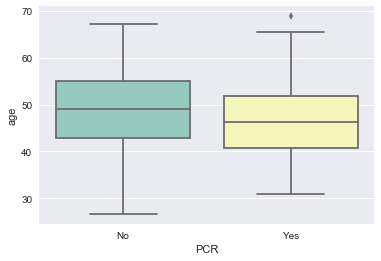

In [6]:
predictor= ['age']
outcome = 'PCR'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

### 2.2 Effect of Age on Survival 

---------------------------------------------
             sum_sq     df         F    PR(>F)
age        0.062227    1.0  0.399719  0.528104
Residual  25.842534  166.0       NaN       NaN
---------------------------------------------


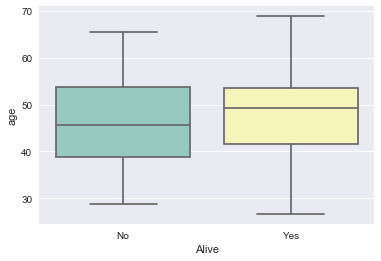

In [7]:
predictor= ['age']
outcome = 'Alive'
anova_table, OLS = inferential_statistics.linear_models(df, outcome, predictor);
sns.boxplot(x= outcome, y=predictor[0], data=df, palette="Set3");

### 2.3 Explore interactions between age, survival, and PCR

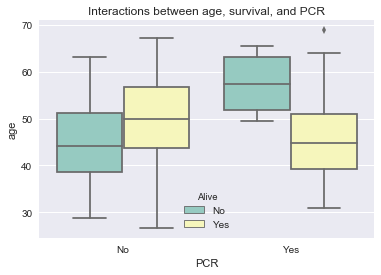

In [8]:
# create a boxplot to visualize this interaction
ax = sns.boxplot(x= 'PCR', y='age', hue ='Alive',data=df, palette="Set3");
ax.set_title('Interactions between age, survival, and PCR');

---------------------------------------------
            sum_sq    df         F    PR(>F)
age       0.539468   1.0  7.470952  0.009065
Residual  3.104976  43.0       NaN       NaN
---------------------------------------------


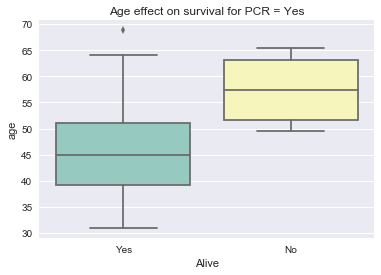

In [9]:
# create dataframe only for patients with PCR = Yes
Patients_with_PCR = df.loc[df.PCR=='Yes',:]

# ANOVA for Alive vs Age for PCR = Yes Only 
anova_table, _ = inferential_statistics.linear_models(Patients_with_PCR, outcome, predictor);
# visualize PCR=Yes only
ax = sns.boxplot(x= outcome, y=predictor[0], data = Patients_with_PCR, palette="Set3");
ax.set_title('Age effect on survival for PCR = Yes');

## Conclusion.

1. `age` has an important effect on `Alive` for patients with `PCR` = Yes
2. This effect can be quantified as an `AUC` = 0.84

### 3.1 Effect of MRI measurements on PCR ANOVA

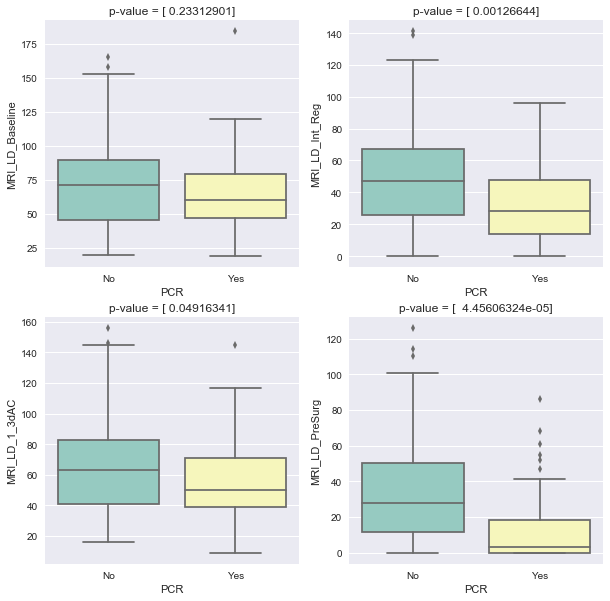

In [10]:
R = inferential_statistics.anova_MRI('PCR', df);

### 3.1 Effect of MRI measurements on PCR:  Logistic Regression 

In [11]:
Outcome = 'PCR'
MRI = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']

y = labels_to_numbers(df,Outcome)
for mri in MRI:
    X = df[mri].values.reshape((y.shape[0],1))
    _LogisticRegression(X,y, title = 'ROC for ' + mri + ' vs '+ Outcome)

NameError: name 'labels_to_numbers' is not defined

In [ ]:
R = inferential_statistics.anova_MRI('Alive', df);

In [ ]:
Outcome = 'Alive'
MRI = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']

y = labels_to_numbers(df,Outcome)
for mri in MRI:
    X = df[mri].values.reshape((y.shape[0],1))
    _LogisticRegression(X,y, title = 'ROC for ' + mri + ' vs '+ Outcome)

In [ ]:
df[Outcome].value_counts(normalize = True)

In [ ]:
Outcome = 'Alive'
MRI = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']


for mri in MRI:
    X = df[mri].values.reshape((y.shape[0],1))

<h1><center> Predictive statistics on the I-SPY1 Clinical Trial</center></h1>

In [31]:
# quantify the effect of age on Survival
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC

def plot_roc_curve(fpr, tpr, lw = 2, title=''):
    auc = metrics.auc(fpr,tpr);
    plt.figure(figsize =(6,6))
    plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
def labels_to_numbers(DataFrame, Variable):
    le = preprocessing.LabelEncoder()
    numbers_ = le.fit_transform(DataFrame[Variable].values)
    return numbers_

def TrainRFC(Xdata,ydata):
    clf= RFC()
    # specify parameters and distributions to sample from
    Forest  = GridSearchCV(clf, param_grid = {"n_estimators": np.arange(10, 100,10),
                                                "max_features": np.arange(1,Xdata.shape[1],1)}, 
                                                   scoring = make_scorer(cohen_kappa_score),
                                                   verbose = 1, n_jobs = -1);
    Forest.fit(Xdata,ydata);
    return Forest.best_estimator_

def TrainLogRegModel_Kappa(Xdata, ydata):
    clf = LogisticRegression()    
    LogRegModel = GridSearchCV(clf, param_grid = {"C": np.arange(1,11,1),
                                                  "fit_intercept": ["True", "False"]},
                                                   scoring = make_scorer(cohen_kappa_score),
                                                   verbose = 0);
    
    
    LogRegModel.fit(Xdata,ydata);
    return LogRegModel


def _LogisticRegression(X,y, title =''):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X,y,  train_size=0.50, stratify = y)
    # train
    clf = TrainLogRegModel_Kappa(X_train,y_train);
    pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_prob);
    kappa = metrics.cohen_kappa_score(clf.predict(X_test),y_test)
    auc =   metrics.auc(fpr,tpr)
    plot_roc_curve(fpr,tpr, title = title)
    return  kappa, auc

def _RFClassifier(X,y, size_train = 0.50):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X,y,  train_size= size_train, stratify = y)
    # train
    clf = TrainRFC(X_train,y_train);
    print(metrics.classification.classification_report(clf.predict(X_test), y_test))
    return clf, X_test, y_test

## 0.1 Effect of MRI measurements on Survival and PCR:  Logistic Regression 

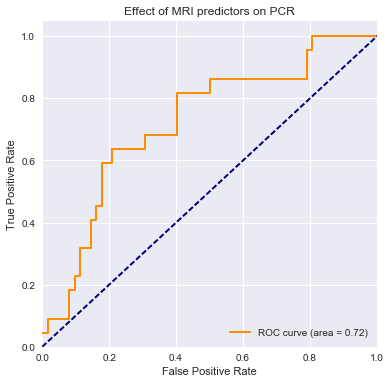

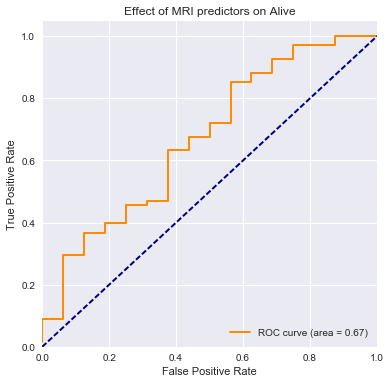

In [13]:
outcomes = ['PCR','Alive']
mri_predictors = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']
for outcome in outcomes:
    y = labels_to_numbers(df, outcome)
    X = pd.get_dummies(df[mri_predictors], drop_first=False).values
    _LogisticRegression(X,y, title = 'Effect of MRI predictors on ' + outcome)

In [14]:
clf

,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
SUBJECTID,,,,,,,,,,,,,,,,,
1001,38.73,Yes,Yes,No,Yes,No,No,88.0,78.0,30.0,14.0,No,1264,751,1,No,2.0


In [43]:
df.columns

Index(['age', 'White', 'ER+', 'PR+', 'HR+', 'Bilateral', 'Right_Breast',
       'MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg',
       'Alive', 'Survival_length', 'RFS', 'RFS_code', 'PCR', 'RCB'],
      dtype='object')

In [54]:
mri_predictors = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']
clinical = ['ER+', 'PR+', 'HR+']
all_pred = mri_predictors + clinical
print(40*'--')
y = labels_to_numbers(df, 'ER+')
X = pd.get_dummies( df[all_pred], drop_first=True).values
clf, X_test, y_test =_RFClassifier(X,y, size_train = 0.50)

--------------------------------------------------------------------------------
Fitting 3 folds for each of 54 candidates, totalling 162 fits
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      1.00      1.00        49

avg / total       1.00      1.00      1.00        84



[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    4.0s finished


In [55]:
print(metrics.classification.classification_report(clf.predict(X), y))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        70
          1       1.00      1.00      1.00        98

avg / total       1.00      1.00      1.00       168



Feature ranking:
1. feature 4 (0.447264): 
2. feature 6 (0.376500): 
3. feature 5 (0.106171): 
4. feature 2 (0.024556): 
5. feature 1 (0.020089): 
6. feature 3 (0.014391): 
7. feature 0 (0.011030): 


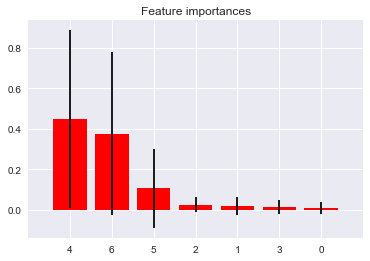

In [57]:
# Plot the feature importances of the forest
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): " % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
outcomes = ['PCR','Alive']
mri_predictors = ['MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg', 'MRI_LD_PreSurg']
for outcome in outcomes:
    y = labels_to_numbers(df, outcome)
    X = pd.get_dummies(df[mri_predictors], drop_first=False).values
    _LogisticRegression(X,y, title = 'Effect of MRI predictors on ' + outcome)

### 3.1 Effect of MRI measurements on PCR:  Logistic Regression 

In [ ]:
_LogisticRegression?

In [ ]:
Forest.best_estimator_.feature_importances_

In [ ]:
from sklearn import preprocessing

# define outcomes
Outcomes = ['Alive','PCR']

import pandas as pd
# define predictors
non_mri_predictors = ['age','White', 'ER+', 'PR+', 'HR+', 'Bilateral', 'Right_Breast']
X = pd.get_dummies(df[non_mri_predictors], drop_first=True).values
X[:,0] = preprocessing.scale(X[:,0])
for out in Outcomes:
    y = labels_to_numbers(df,out)
    # fit
    #_LogisticRegression(X,y, title = 'ROC for non-MRI Predictors ' + ' vs '+ out)
    LogReg(X,y )

In [ ]:
LogReg(X,y )

In [ ]:


# define outcomes

Outcomes = ['Alive','PCR']

# define predictors
mri_predictors = ['MRI_LD_Baseline']
X = df[mri_predictors].values
X = preprocessing.scale(X)

for out in Outcomes:
    y = labels_to_numbers(df,out)
    # fit
    _LogisticRegression(X,y, title = 'ROC for MRI Predictors ' + ' vs '+ out)

In [ ]:
all_predictors = mri_predictors + non_mri_predictors
X = pd.get_dummies(df[all_predictors], drop_first=True).values

for out in Outcomes:
    y = labels_to_numbers(df,out)
    # fit
#    _LogisticRegression(X,y, title = 'ROC for ALL Predictors ' + ' vs '+ out)
    LogReg(X,y )

In [ ]:
X.shape[1]

In [ ]:
import keras
from keras import optimizers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
outcome = 'PCR'
y = labels_to_numbers(df,outcome)
y_ = keras.utils.to_categorical(y, 2)

num_features = X.shape[1]
num_labels =   2

model = Sequential()
model.add( Dense( units = int(num_features), input_dim = num_features, activation = 'relu'))
model.add( Dense( units = int(num_features), input_dim = num_features, activation = 'relu'))
model.add( Dense( num_labels, activation = 'softmax'))


sgd = optimizers.SGD(lr = 0.0008, decay = 1e-6, momentum=0.9, nesterov=True)

# compile
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# run
history = model.fit(X, y_, batch_size = 128,
                        epochs = 1000, verbose = 0,
                                            validation_split= 0.33)
# evaluate
print(model.summary())
score = model.evaluate(X, y_, verbose = 5)
print('Test score:',score[0])
print('Test accurracy:',score[1])

In [ ]:
metrics.classification.confusion_matrix(model.predict_classes(X),y)

In [ ]:
metrics.classification.cohen_kappa_score(model.predict_classes(X),y)

In [ ]:
df[outcome].value_counts().apply(lambda x : 100 * x /  df.shape[0])

In [ ]:
df[outcome].value_counts()